<a href="https://colab.research.google.com/github/Choyoons/Choyoons/blob/main/section4_project_%EC%A1%B0%EC%9C%A4%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1
!pip install 'h5py==2.10.0' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-rc1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-rc1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 7.2 MB/s 
     |████████████████████████████████| 17.1 MB 24 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Un

In [1]:
import numpy as np

rows = np.loadtxt("./lotto.csv", delimiter=",")
row_count = len(rows)
print(row_count)

1043


In [3]:
import numpy as np

def numbers2ohbin(numbers):

    ohbin = np.zeros(45) 

    for i in range(6):
        ohbin[int(numbers[i])-1] = 1 
    
    return ohbin


def ohbin2numbers(ohbin):

    numbers = []
    
    for i in range(len(ohbin)):
        if ohbin[i] == 1.0: 
            numbers.append(i+1)
    
    return numbers

In [4]:
numbers = rows[:, 1:7]
ohbins = list(map(numbers2ohbin, numbers))

x_samples = ohbins[0:row_count-1]
y_samples = ohbins[1:row_count]

print("ohbins")
print("X[0]: " + str(x_samples[0]))
print("Y[0]: " + str(y_samples[0]))

print("numbers")
print("X[0]: " + str(ohbin2numbers(x_samples[0])))
print("Y[0]: " + str(ohbin2numbers(y_samples[0])))

ohbins
X[0]: [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Y[0]: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
numbers
X[0]: [3, 5, 12, 22, 26, 31]
Y[0]: [5, 14, 15, 23, 34, 43]


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
train_idx = (0, 800)
val_idx = (801, 950)
test_idx = (951, len(x_samples))

print("train: {0}, val: {1}, test: {2}".format(train_idx, val_idx, test_idx))

train: (0, 800), val: (801, 950), test: (951, 1042)


In [19]:

train_loss = []
train_acc = []
val_loss = []
val_acc = []


for epoch in range(100):

    model.reset_states()

    batch_train_loss = []
    batch_train_acc = []
    
    for i in range(train_idx[0], train_idx[1]):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) 

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys) 
        
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))

epoch    0 train acc 0.021 loss 0.409 val acc 0.000 loss 0.396
epoch    1 train acc 0.016 loss 0.396 val acc 0.000 loss 0.396
epoch    2 train acc 0.021 loss 0.394 val acc 0.000 loss 0.395
epoch    3 train acc 0.026 loss 0.392 val acc 0.013 loss 0.396
epoch    4 train acc 0.024 loss 0.389 val acc 0.027 loss 0.397
epoch    5 train acc 0.036 loss 0.384 val acc 0.040 loss 0.400
epoch    6 train acc 0.046 loss 0.379 val acc 0.040 loss 0.405
epoch    7 train acc 0.050 loss 0.373 val acc 0.027 loss 0.409
epoch    8 train acc 0.060 loss 0.367 val acc 0.027 loss 0.412
epoch    9 train acc 0.066 loss 0.362 val acc 0.034 loss 0.415
epoch   10 train acc 0.070 loss 0.355 val acc 0.034 loss 0.419
epoch   11 train acc 0.071 loss 0.349 val acc 0.027 loss 0.423
epoch   12 train acc 0.076 loss 0.342 val acc 0.034 loss 0.428
epoch   13 train acc 0.081 loss 0.334 val acc 0.034 loss 0.432
epoch   14 train acc 0.083 loss 0.326 val acc 0.040 loss 0.437
epoch   15 train acc 0.096 loss 0.317 val acc 0.027 los

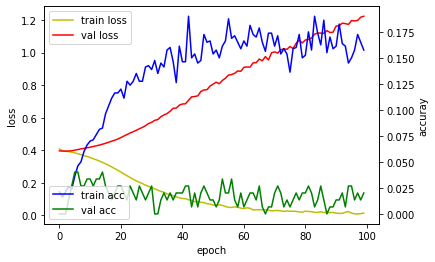

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
mean_prize = [ np.mean(rows[87:, 8]),
           np.mean(rows[87:, 9]),
           np.mean(rows[87:, 10]),
           np.mean(rows[87:, 11]),
           np.mean(rows[87:, 12])]

print(mean_prize)   

[2727537648.5941424, 64683631.94037657, 1614346.7332635983, 58851.921548117156, 5455.020920502092]


In [21]:
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return 0, mean_prize[0]
    elif count == 5 and true_bonus in pred_numbers:
        return 1, mean_prize[1]
    elif count == 5:
        return 2, mean_prize[2]
    elif count == 4:
        return 3, mean_prize[3]
    elif count == 3:
        return 4, mean_prize[4]

    return 5, 0

In [22]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) 
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [23]:
train_total_reward = []
train_total_grade = np.zeros(6, dtype=int)

val_total_reward = []
val_total_grade = np.zeros(6, dtype=int)

test_total_reward = []
test_total_grade = np.zeros(6, dtype=int)

model.reset_states()

print('[No. ] 1st 2nd 3rd 4th 5th 6th Rewards')

for i in range(len(x_samples)):
    xs = x_samples[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs) 
    
    sum_reward = 0
    sum_grade = np.zeros(6, dtype=int) 

    for n in range(10): 
        numbers = gen_numbers_from_probability(ys_pred[0])
        
        
        grade, reward = calc_reward(rows[i+1,1:7], rows[i+1,7], numbers) 
        
        sum_reward += reward
        sum_grade[grade] += 1

        if i >= train_idx[0] and i < train_idx[1]:
            train_total_grade[grade] += 1
        elif i >= val_idx[0] and i < val_idx[1]:
            val_total_grade[grade] += 1
        elif i >= test_idx[0] and i < test_idx[1]:
            val_total_grade[grade] += 1
    
    if i >= train_idx[0] and i < train_idx[1]:
        train_total_reward.append(sum_reward)
    elif i >= val_idx[0] and i < val_idx[1]:
        val_total_reward.append(sum_reward)
    elif i >= test_idx[0] and i < test_idx[1]:
        test_total_reward.append(sum_reward)
                        
    print('[{0:4d}] {1:3d} {2:3d} {3:3d} {4:3d} {5:3d} {6:3d} {7:15,d}'.format(i+1, sum_grade[0], sum_grade[1], sum_grade[2], sum_grade[3], sum_grade[4], sum_grade[5], int(sum_reward)))

print('Total') 
print('==========')    
print('Train {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(train_total_grade[0], train_total_grade[1], train_total_grade[2], train_total_grade[3], train_total_grade[4], train_total_grade[5], int(sum(train_total_reward))))
print('Val   {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(val_total_grade[0], val_total_grade[1], val_total_grade[2], val_total_grade[3], val_total_grade[4], val_total_grade[5], int(sum(val_total_reward))))
print('Test  {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(test_total_grade[0], test_total_grade[1], test_total_grade[2], test_total_grade[3], test_total_grade[4], test_total_grade[5], int(sum(test_total_reward))))
print('==========')    

[No. ] 1st 2nd 3rd 4th 5th 6th Rewards
[   1]   7   0   2   0   1   0  19,095,997,688
[   2]   3   0   6   1   0   0   8,192,357,878
[   3]   3   0   3   3   1   0   8,187,637,996
[   4]   3   0   6   1   0   0   8,192,357,878
[   5]   0   0   8   2   0   0      13,032,477
[   6]   2   0   7   1   0   0   5,466,434,576
[   7]   8   0   2   0   0   0  21,823,529,882
[   8]   4   0   4   2   0   0  10,916,725,685
[   9]   1   0   5   2   2   0   2,735,737,996
[  10]   3   0   4   3   0   0   8,189,246,888
[  11]   3   0   5   2   0   0   8,190,802,383
[  12]   0   0   5   4   1   0       8,312,596
[  13]   2   0   7   0   1   0   5,466,381,179
[  14]   4   0   5   1   0   0  10,918,281,179
[  15]   5   0   5   0   0   0  13,645,759,976
[  16]   2   0   5   3   0   0   5,463,323,586
[  17]   4   0   5   1   0   0  10,918,281,179
[  18]   1   0   5   1   3   0   2,735,684,599
[  19]   3   0   5   1   1   0   8,190,748,986
[  20]   4   0   5   1   0   0  10,918,281,179
[  21]   2   0   4   

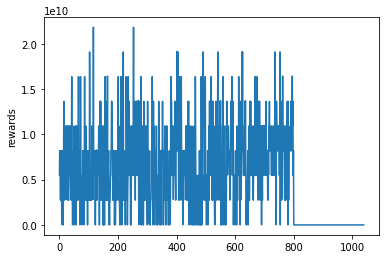

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

total_reward = train_total_reward + val_total_reward + test_total_reward

plt.plot(total_reward)
plt.ylabel('rewards')
plt.show()

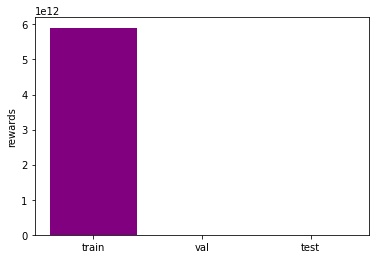

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

rewards = [sum(train_total_reward), sum(val_total_reward), sum(test_total_reward)]

class_color=['purple', 'green', 'red']

plt.bar(['train', 'val', 'test'], rewards, color=class_color)
plt.ylabel('rewards')
plt.show()

In [25]:
for epoch in range(100):

    model.reset_states() 

    for i in range(len(x_samples)):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) 

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss)))  

epoch    0 train acc 0.149 loss 0.157
epoch    1 train acc 0.140 loss 0.202
epoch    2 train acc 0.141 loss 0.202
epoch    3 train acc 0.142 loss 0.194
epoch    4 train acc 0.142 loss 0.185
epoch    5 train acc 0.141 loss 0.176
epoch    6 train acc 0.142 loss 0.167
epoch    7 train acc 0.143 loss 0.159
epoch    8 train acc 0.146 loss 0.152
epoch    9 train acc 0.147 loss 0.146
epoch   10 train acc 0.147 loss 0.141
epoch   11 train acc 0.148 loss 0.136
epoch   12 train acc 0.149 loss 0.131
epoch   13 train acc 0.151 loss 0.126
epoch   14 train acc 0.152 loss 0.122
epoch   15 train acc 0.153 loss 0.119
epoch   16 train acc 0.154 loss 0.115
epoch   17 train acc 0.155 loss 0.112
epoch   18 train acc 0.154 loss 0.109
epoch   19 train acc 0.154 loss 0.106
epoch   20 train acc 0.154 loss 0.103
epoch   21 train acc 0.155 loss 0.101
epoch   22 train acc 0.155 loss 0.098
epoch   23 train acc 0.155 loss 0.096
epoch   24 train acc 0.155 loss 0.094
epoch   25 train acc 0.155 loss 0.092
epoch   26 t

In [41]:
print('receive numbers')

xs = x_samples[-1].reshape(1, 1, 45)


ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(5):
  numbers = gen_numbers_from_probability(ys_pred[0])
  numbers.sort()
  print('{0} : {1}'.format(n, numbers))
  list_numbers.append(numbers)

receive numbers
0 : [5, 6, 7, 18, 19, 36]
1 : [1, 2, 6, 7, 19, 39]
2 : [2, 7, 18, 19, 28, 37]
3 : [2, 6, 10, 16, 19, 28]
4 : [2, 6, 10, 19, 28, 38]
